### set up path

In [ ]:
GLOBAL_PATH = "drive/MyDrive/HSE_local_hw/prod_story/HW_01"

In [ ]:
%cd {GLOBAL_PATH}

/content/drive/MyDrive/HSE_local_hw/prod_story/HW_01


In [ ]:
!unzip "test.zip" 

Archive:  test.zip
  inflating: test.csv                


In [ ]:
!unzip "train01.zip" 

Archive:  train01.zip
  inflating: train01.csv             


In [ ]:
!unzip "train02.zip" 

Archive:  train02.zip
  inflating: train02.csv             


In [ ]:
!ls

Prod_story_01.ipynb  test.zip	  train01.zip  train02.zip
test.csv	     train01.csv  train02.csv


### reading data

In [ ]:
import pandas as pd
import numpy as np
from copy import deepcopy

In [ ]:
df_train01 = pd.read_csv("train01.csv", sep=';',)

In [ ]:
df_train01

,id,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42
0,-9196902500682081904,0,-2201458060675810556,01.09.2008,6312572492787112517,182,-6.347413e+18,2066976859146697559,0,[4770.1499999999996 885.49000000000001 1956.36...,[4770.1499999999996 885.49000000000001 1956.36...,"[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[nan, 1.0, nan, nan, 1.0, 1.0]","[nan, 0.0, nan, nan, 0.0, 0.0]","[nan, 1.0, nan, nan, 0.0, 0.0]","[nan, 0.0, nan, nan, 0.0, 0.0]","[nan, 1.0, nan, nan, 0.0, 0.0]","[nan, 0.94, nan, nan, 47.67, 141.2]","[nan, 0.02, nan, nan, 47.67, 70.6]","[nan, 0.28, nan, nan, 0.0, 9969.07]","[nan, 0.0, nan, nan, 0.0, 0.0]","[nan, 0.0, nan, nan, 0.0, 0.0]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[nan, 0.0, nan, nan, 0.0, 0.0]","[nan, 2.0, nan, nan, 1.0, 2.0]","[nan, nan, nan, nan, 1.0, 4.0]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[3.0, 2.0, 1.0, nan, nan, 1.0]","[67.64, 67.64, 67.64, 67.64, 67.64, 67.64]","[224.79, 224.79, 224.79, 224.79, 224.79, 224.79]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[80.46, 80.46, 80.46, 80.46, 80.46, 80.46]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]"
1,-9196902500682081900,0,-2201458060675810556,05.02.2013,4293238556669161936,182,-8.465179e+18,-8648529837587014226,0,[328.93000000000001 3.9700000000000002 996.149...,[328.93000000000001 3.9700000000000002 996.149...,"[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[nan, nan, 0.0, 0.0, nan, 0.0]","[nan, nan, 0.0, 0.0, nan, 0.0]","[nan, nan, 0.0, 0.0, nan, 0.0]","[nan, nan, 1.0, 0.0, nan, 0.0]","[nan, nan, 0.0, 0.0, nan, 0.0]","[nan, nan, 0.25, 0.13, nan, 0.0]","[nan, nan, 0.0, 0.13, nan, 0.0]","[nan, nan, 0.02, 0.0, nan, 0.0]","[nan, nan, 0.0, 0.0, nan, 0.0]","[nan, nan, 0.0, 0.0, nan, 0.0]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[nan, nan, 0.0, 0.0, nan, 0.0]","[nan, nan, 1.0, nan, nan, nan]","[nan, nan, 2.0, nan, nan, 2.0]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[4.0, nan, nan, 2.0, 3.0, 7.0]","[90.27, 90.27, 90.27, 90.27, 90.27, 90.27]","[249.94, 249.94, 249.94, 249.94, 155.64, 155.64]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[103.09, 103.09, 103.09, 103.09, 103.09, 103.09]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]"
2,-9196902500682081899,0,-2201458060675810556,01.09.2008,6312572492787112517,175,5.417474e+18,-5480331477604673780,1,[0.28000000000000003 0.39000000000000001 387.1...,[0.28000000000000003 0.39000000000000001 387.1...,"[nan, nan, nan, nan, nan, nan]","[1.0, nan, 1.0, nan, nan, nan]","[nan, 7.0, nan, nan, nan, nan]","[nan, 0.0, nan, nan, nan, nan]","[nan, 0.0, nan, nan, nan, nan]","[nan, 0.0, nan, nan, nan, nan]","[nan, 0.0, nan, nan, nan, nan]","[nan, 0.0, nan, nan, nan, nan]","[nan, 0.0, nan, nan, nan, nan]","[nan, 0.0, nan, nan, nan, nan]","[nan, 0.0, nan, nan, nan, nan]","[nan, 0.0, nan, nan, nan, nan]","[nan, 0.0, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[nan, 0.0, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[nan, 2.0, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[1.0, nan, nan, nan, nan, 2.0]","[67.64, 67.64, 67.64, 67.64, 67.64, 67.64]","[196.61, 224.79, 197.55, 2

In [ ]:
df_train02 = pd.read_csv("train02.csv", sep=';',)

In [ ]:
df_train02

,id,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42
0,-9196902500682081897,0,-2201458060675810556,01.09.2008,6312572492787112517,184,-6.347413e+18,-3150357754345161454,0,[607.29999999999995 66.569999999999993 254.770...,[607.29999999999995 66.569999999999993 254.770...,"[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[nan, nan, nan, nan, nan, nan]","[1.0, nan, 1.0, nan, nan, 1.0]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[nan, nan, 1.0, 2.0, 1.0, nan]","[67.64, 67.64, 67.64, 67.64, 67.64, 67.64]","[199.65, 199.65, 199.65, 199.65, 199.65, 199.65]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[80.46, 80.46, 80.46, 80.46, 80.46, 80.46]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]"
1,-9196902500682081892,0,-2201458060675810556,01.09.2008,6312572492787112517,184,-6.347413e+18,-7360658494542411652,0,[0.81999999999999995 25.800000000000001 31.16 ...,[0.81999999999999995 25.800000000000001 31.16 ...,"[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[1.0, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[149.36, 149.36, 149.36, 149.36, 149.36, 149.36]","[nan, nan, nan, nan, nan, nan]","[77.19, 77.19, 77.19, 77.19, 77.19, 77.19]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]"
2,-9196902500681081898,0,-2201458060675810556,01.09.2008,6312572492787112517,58,-8.465179e+18,-8648529837587014226,4,[969.96000000000004 2322.6300000000001 797.63 ...,[969.96000000000004 2322.6300000000001 797.63 ...,"[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[15.0, 30.0, 19.0, 30.0, 18.0, 14.0]","[nan, nan, 1.0, nan, 0.0, 0.0]","[nan, nan, 0.0, nan, 1.0, 0.0]","[nan, nan, 0.0, nan, 0.0, 0.0]","[nan, nan, 0.0, nan, 0.0, 0.0]","[nan, nan, 0.0, nan, 0.0, 0.0]","[nan, nan, 0.01, nan, 0.0, 0.0]","[nan, nan, 0.01, nan, 0.0, 0.0]","[nan, nan, 0.0, nan, 0.0, 0.0]","[nan, nan, 0.0, nan, 0.0, 0.0]","[nan, nan, 0.0, nan, 0.0, 0.0]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[nan, nan, 0.0, nan, 0.0, 0.0]","[nan, nan, 1.0, nan, 1.0, nan]","[nan, nan, nan, nan, nan, 1.0]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[nan, 1.0, 3.0, 2.0, nan, nan]","[nan, nan, nan, nan, nan, nan]","[105.36, 61.35, 105.36, 61.35, 105.36, 105.36]","[nan, nan, nan, 

In [ ]:
df_test = pd.read_csv("test.csv", sep=';',)

In [ ]:
df_test

,id,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42
0,-9196902500682081904,-2201458060675810556,2008-09-01 00:00:00,6312572492787112517,183,-6.347413e+18,2066976859146697559,0,[431.63 188.56999999999999 430.73000000000002 ...,[431.63 188.56999999999999 430.73000000000002 ...,"[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[nan, nan, 1.0, 1.0, 0.0, 0.0]","[nan, nan, 0.0, 0.0, 0.0, 0.0]","[nan, nan, 0.0, 0.0, 0.0, 0.0]","[nan, nan, 0.0, 0.0, 0.0, 0.0]","[nan, nan, 0.0, 0.0, 0.0, 0.0]","[nan, nan, 47.67, 141.2, 0.0, 0.0]","[nan, nan, 47.67, 70.6, 0.0, 0.0]","[nan, nan, 0.0, 9969.07, 0.0, 0.0]","[nan, nan, 0.0, 0.0, 0.0, 0.0]","[nan, nan, 0.0, 0.0, 0.0, 0.0]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[nan, nan, 0.0, 0.0, 0.0, 0.0]","[nan, nan, 1.0, 2.0, nan, nan]","[nan, nan, 1.0, 4.0, 1.0, nan]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[1.0, nan, nan, 1.0, nan, 6.0]","[67.64, 67.64, 67.64, 67.64, 67.64, 67.64]","[224.79, 224.79, 224.79, 224.79, 224.79, 224.79]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[80.46, 80.46, 80.46, 80.46, 80.46, 80.46]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]"
1,-9196902500681081889,-2201458060675810556,2008-09-01 00:00:00,6312572492787112517,183,3.052557e+18,-8367157107954005236,0,[287.63 8051.1199999999999 5301.6700000000001 ...,[287.63 8051.1199999999999 5301.6700000000001 ...,"[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[0.0, 1.0, nan, nan, 0.0, nan]","[0.0, 0.0, nan, nan, 0.0, nan]","[0.0, 0.0, nan, nan, 0.0, nan]","[0.0, 0.0, nan, nan, 0.0, nan]","[0.0, 0.0, nan, nan, 0.0, nan]","[0.0, 57.93, nan, nan, 0.0, nan]","[0.0, 57.93, nan, nan, 0.0, nan]","[0.0, 0.0, nan, nan, 0.0, nan]","[0.0, 1.0, nan, nan, 0.0, nan]","[0.0, 0.0, nan, nan, 0.0, nan]","[nan, 85.65, nan, nan, nan, nan]","[nan, 85.65, nan, nan, nan, nan]","[nan, 0.0, nan, nan, nan, nan]","[0.0, 0.0, nan, nan, 0.0, nan]","[nan, 1.0, nan, nan, nan, nan]","[1.0, 1.0, nan, nan, 1.0, nan]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[nan, 1.0, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[nan, 0.0, nan, nan, nan, nan]","[nan, nan, nan, 2.0, 1.0, nan]","[67.64, 67.64, 67.64, 67.64, 67.64, 67.64]","[199.65, 199.65, 199.65, 199.65, 199.65, 199.65]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[80.46, 80.46, 80.46, 80.46, 80.46, 80.46]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]"
2,-9196902500679081891,-2201458060675810556,2011-03-01 00:00:00,6312572492787112517,137,-8.465179e+18,2066976859146697559,2,[45.520000000000003 728.21000000000004 2548.57...,[45.520000000000003 728.21000000000004 2548.57...,"[nan, nan, nan, nan, nan, nan]","[1.0, nan, 1.0, nan, nan, nan]","[nan, 30.0, 7.0, nan, 9.0, nan]","[0.0, nan, 0.0, nan, 0.0, nan]","[1.0, nan, 2.0, nan, 1.0, nan]","[0.0, nan, 1.0, nan, 0.0, nan]","[0.0, nan, 0.0, nan, 0.0, nan]","[0.0, nan, 0.0, nan, 0.0, nan]","[0.14, nan, 0.49, nan, 0.02, nan]","[0.14, nan, 0.41, nan, 0.02, nan]","[0.0, nan, 0.05, nan, 0.0, nan]","[0.0, nan, 0.0, nan, 0.0, nan]","[0.0, nan, 0.0, nan, 0.0, nan]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[0.0, nan, 0.0, nan, 0.0, nan]","[nan, nan, 1.0, nan, 1.0, nan]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, 4.0, nan]","[75.18, 67.64, 75.18, 75.18, 75.18, 75.18]","[195.

### data analysis

проанализировать данные:

x1, ..., x7 - единое число, метка

x8, ..., x42 - ряды

Проанализировать вместе:

х1-х7

х8-х42

---

id - id

y - класс

х1 - ? 

х2 - дата

In [ ]:
for name in df_train01.columns:
    print(f"{name}: {df_train01[name].unique().shape[0]}")

id: 91946
y: 2
x1: 17
x2: 3823
x3: 9
x4: 183
x5: 22
x6: 577
x7: 16
x8: 85788
x9: 85788
x10: 61
x11: 64
x12: 22272
x13: 3587
x14: 7418
x15: 1598
x16: 1871
x17: 736
x18: 53125
x19: 45453
x20: 32884
x21: 755
x22: 147
x23: 5133
x24: 5135
x25: 559
x26: 218
x27: 4940
x28: 6119
x29: 843
x30: 545
x31: 131
x32: 373
x33: 124
x34: 4435
x35: 4991
x36: 18342
x37: 1300
x38: 1401
x39: 4995
x40: 305
x41: 170
x42: 420


### сформируем новый датасет на основе данного

In [ ]:
df_clean = deepcopy(df_train01.id)
df_clean = pd.DataFrame(df_clean)

In [ ]:
df_clean.insert(1, 'y', df_train01.y)

In [ ]:
df_clean

,id,y
0,-9196902500682081904,0
1,-9196902500682081900,0
2,-9196902500682081899,0
3,-9196902500682081897,0
4,-9196902500681081897,0
...,...,...
91941,9162040885607725763,0
91942,9162040885607725766,0
91943,9162040885608725764,0
91944,9162040885608725770,0


In [ ]:
days, months, years = [], [], []
for date in df_train01.x2:
    try:
        day, month, year = date.split('.')
        day, month, year = int(day), int(month), int(year)
    except:
        day, month, year = np.nan, np.nan, np.nan
    days.append(day)
    months.append(month)
    years.append(year)

In [ ]:
df_clean.insert(2, 'x2_day', days)
df_clean.insert(3, 'x2_month', months)
df_clean.insert(4, 'x2_year', years)

In [ ]:
df_clean

,id,y,x2_day,x2_month,x2_year
0,-9196902500682081904,0,1.0,9.0,2008.0
1,-9196902500682081900,0,5.0,2.0,2013.0
2,-9196902500682081899,0,1.0,9.0,2008.0
3,-9196902500682081897,0,1.0,9.0,2008.0
4,-9196902500681081897,0,1.0,9.0,2008.0
...,...,...,...,...,...
91941,9162040885607725763,0,21.0,12.0,2011.0
91942,9162040885607725766,0,21.0,12.0,2011.0
91943,9162040885608725764,0,21.0,12.0,2011.0
91944,9162040885608725770,0,2.0,12.0,2013.0


In [ ]:
np.sort(df_clean.x2_month.unique())

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., nan])

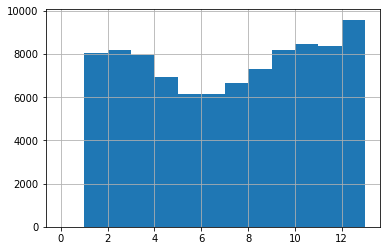

In [ ]:
df_clean.x2_month.dropna().hist(bins=np.linspace(0, 13, 14))

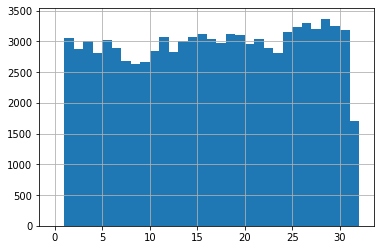

In [ ]:
df_clean.x2_day.dropna().hist(bins=np.linspace(0, 32, 33))

In [ ]:
df_clean[df_clean.x2_day == 1].shape

(3055, 5)

In [ ]:
np.sort(df_clean.x2_year.unique())

array([2001., 2002., 2003., 2004., 2005., 2006., 2007., 2008., 2009.,
       2010., 2011., 2012., 2013., 2014., 2015., 2016., 2017., 3201.,
         nan])

In [ ]:
df_clean[df_clean.x2_year == 3201]

,id,y,x2_day,x2_month,x2_year
74097,6037638172626199924,0,26.0,3.0,3201.0


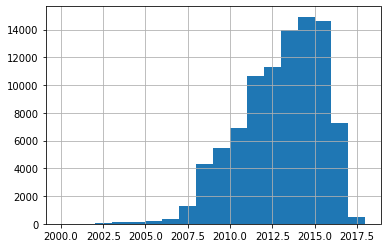

In [ ]:
df_clean.x2_year.dropna().hist(bins=np.linspace(2000, 2018, 19))

In [ ]:
df_clean[df_clean.x2_year == 2017].shape

(458, 5)

In [ ]:
###

In [ ]:
!ls

pandas-profiling-master.zip  test.csv  train01.csv  train02.csv
Prod_story_01.ipynb	     test.zip  train01.zip  train02.zip


In [ ]:
!unzip "pandas-profiling-master.zip" 

In [ ]:
%cd pandas-profiling-master

/content/drive/MyDrive/HSE_local_hw/prod_story/HW_01/pandas-profiling-master


In [ ]:
!python setup.py install

running install
running bdist_egg
running egg_info
writing src/pandas_profiling.egg-info/PKG-INFO
writing dependency_links to src/pandas_profiling.egg-info/dependency_links.txt
writing entry points to src/pandas_profiling.egg-info/entry_points.txt
writing requirements to src/pandas_profiling.egg-info/requires.txt
writing top-level names to src/pandas_profiling.egg-info/top_level.txt
reading manifest file 'src/pandas_profiling.egg-info/SOURCES.txt'
reading manifest template 'MANIFEST.in'
adding license file 'LICENSE'
writing manifest file 'src/pandas_profiling.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
copying src/pandas_profiling/version.py -> build/lib/pandas_profiling
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/pandas_profiling
copying build/lib/pandas_profiling/__init__.py -> build/bdist.linux-x86_64/egg/pandas_profiling
copying build/lib/pandas_profiling/config.py -> build/bdist.

In [ ]:
!pip install --upgrade scipy

     |████████████████████████████████| 28.5 MB 48 kB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
import pandas_profiling

In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
df = pd.DataFrame(np.random.rand(100, 5), columns=["a", "b", "c", "d", "e"])
# rep = ProfileReport(df, title="Pandas Profiling Report")

In [ ]:
df

,a,b,c,d,e
0,0.967513,0.205136,0.643230,0.927908,0.340301
1,0.950632,0.175519,0.181492,0.884120,0.016095
2,0.727178,0.003279,0.452765,0.070083,0.920579
3,0.364794,0.109122,0.051071,0.335776,0.474834
4,0.908410,0.424057,0.094237,0.091971,0.361506
...,...,...,...,...,...
95,0.675897,0.747777,0.501644,0.265825,0.586388
96,0.344105,0.943340,0.217275,0.010623,0.933122
97,0.082439,0.149658,0.647624,0.129933,0.697093
98,0.314610,0.318643,0.048633,0.732369,0.519079


In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import sys

!{sys.executable} -m pip install -U pandas-profiling[notebook]
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [ ]:
import pandas_profiling

In [ ]:
report = df.profile_report(df)

AttributeError: ignored

### тестовая выборка

### разметим дату (x2)

In [ ]:
dates, times = [], []
for value in df_test.x2:
    try:       
        date, time = value.split()
    except:
        date, time = 'None', 'None'
    dates.append(date)
    times.append(time)

In [ ]:
np.unique(times) # время не несет никакой полезной информации

array(['00:00:00', 'None'], dtype='<U8')

In [ ]:
x2_year, x2_month, x2_day = [], [], []
for date in dates:
    try:
        year, month, day = date.split('-')
        year, month, day = int(year), int(month), int(day)
    except:
        year, month, day = 'None', 'None', 'None'
    x2_year.append(year)
    x2_month.append(month)
    x2_day.append(day)

In [ ]:
df_clean.insert(1, "x2_year", x2_year)
df_clean.insert(2, "x2_month", x2_month)
df_clean.insert(3, "x2_day", x2_day)

In [ ]:
df_clean

,id,x2_year,x2_month,x2_day
0,-9196902500682081904,2008,9,1
1,-9196902500681081889,2008,9,1
2,-9196902500679081891,2011,3,1
3,-9196902500679081889,2008,9,1
4,-9196902500677081902,2008,9,1
...,...,...,...,...
23381,9162040885603725791,2011,12,21
23382,9162040885604725788,2013,4,29
23383,9162040885604725791,2011,12,21
23384,9162040885608725764,2011,12,21


### проверим год

In [ ]:
df_clean.x2_year.unique()

array([2008, 2011, 2014, 2016, 2012, 2009, 2015, 2013, 'None', 2017, 2010,
       2007, 2005, 2006, 2004, 2003, 2002], dtype=object)

In [ ]:
df_clean.x2_day.unique()

array([1, 2, 30, 3, 4, 25, 15, 5, 10, 26, 23, 27, 14, 28, 29, 13, 8, 9, 6,
       24, 19, 20, 18, 21, 12, 11, 16, 22, 'None', 31, 7, 17],
      dtype=object)

In [ ]:
df_clean.x2_month.unique()

array([9, 3, 12, 1, 7, 8, 4, 5, 10, 11, 6, 2, 'None'], dtype=object)

###

In [ ]:
df_test.x23 == df_test.x24

array([False,  True])

###

In [ ]:
df_test.x8[0]

'[431.63 188.56999999999999 430.73000000000002 407.01999999999998\n 1044.1600000000001 6178.3900000000003 6576.1400000000003 425.75\n 3564.6100000000001 4800.4000000000015 2599.5700000000002\n 712.69000000000005 4267.0 471.54000000000002 252.19999999999999\n 3423.4500000000007 5074.9700000000003 4248.71 2942.2800000000002\n 719.58000000000004 409.55000000000001 8361.7999999999993\n 3984.1100000000001 505.50999999999999 233.28 1445.25 2243.73\n 2213.6500000000001 166.71000000000001 588.21000000000004\n 857.57000000000005 295.56 3933.7399999999998 5679.6599999999999 216.03\n 7093.6700000000001 8815.9899999999998 3541.7200000000007\n 9090.1100000000006 947.46000000000004 2844.1500000000001\n 224.69999999999999 466.67000000000002 1412.2 776.23000000000002\n 1248.1900000000001 809.67000000000019 468.81 130.5 0.10000000000000001\n 258.85000000000002 5394.4800000000014 39.07 107.51000000000001\n 34.700000000000003 0.02 0.02 133.69999999999999 2160.3699999999999\n 0.029999999999999999 1671.75 

In [ ]:
df_test.x9[0]

'[431.63 188.56999999999999 430.73000000000002 407.01999999999998\n 1044.1600000000001 6178.3900000000003 6576.1400000000003 425.75\n 3564.6100000000001 4800.4000000000015 2599.5700000000002\n 712.69000000000005 4267.0 471.54000000000002 252.19999999999999\n 3423.4500000000007 5074.9700000000003 4248.71 2942.2800000000002\n 719.58000000000004 409.55000000000001 8361.7999999999993\n 3984.1100000000001 505.50999999999999 233.28 1445.25 2243.73\n 2213.6500000000001 166.71000000000001 588.21000000000004\n 857.57000000000005 295.56 3933.7399999999998 5679.6599999999999 216.03\n 7093.6700000000001 8815.9899999999998 3541.7200000000007\n 9090.1100000000006 947.46000000000004 2844.1500000000001\n 224.69999999999999 466.67000000000002 1412.2 776.23000000000002\n 1248.1900000000001 809.67000000000019 468.81 130.5 0.10000000000000001\n 258.85000000000002 5394.4800000000014 39.07 107.51000000000001\n 34.700000000000003 0.02 0.02 133.69999999999999 2160.3699999999999\n 0.029999999999999999 1671.75 